<a href="https://colab.research.google.com/github/ssspetrovic/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikacija slika**
### Praktično istraživanje na temu obučavanja konvolucione neuronske mreže za klasifikaciju slika iz CIFAR-10 ulaznog skupa podataka

**Autor:** Srđan Petrović IN 47/2020  
**Predmet:** Metode i tehnike nauke o podacima  

*Fakultet tehničkih nauka* <br>
*Univerzitet u Novom Sadu, 2023*


# Instaliranje potrebnih paketa

In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install opencv-python

# Uvoz neophodnih biblioteka
Osnovne biblioteke iz pređašnje instaliranih paketa, neophodne za formiranje modela i uvoz podataka


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import np_utils
from keras import datasets, layers, models
import cv2

## Učitavanje skupa podataka putem keras biblioteke

---


- Skup u pitanju: *CIFAR-10*
- Više informacija dostupno na: https://www.cs.toronto.edu/~kriz/cifar.html

In [71]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Kreiramo niz labela kategorija u redosledu koji je zadat u skupu podata


In [72]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

## Manipulacija ulaznim skupom podataka
Evo kako izgledaju "sirovi" ulazni podaci

In [ ]:
print("\nPrimer jednog kanala ulazne slike:")
print(train_images[0][0][:3])
print("\nPrimer nekoliko izgleda oblika ulaznih labela:")
print(train_labels[:5])


Primer jednog kanala ulazne slike:
[[59 62 63]
 [43 46 45]
 [50 48 43]]

Primer nekoliko izgleda oblika ulaznih labela:
[[6]
 [9]
 [9]
 [4]
 [1]]


Kako bismo poboljšali performanse modela, normalizujemo vrednosti ulaznih slika tako da budu između 0 i 1 <br>
Razlog deljenja sa 255 jeste taj što vrednosti R, G i B kanala kod svake slike varira od 0 do 255 <br><br>
Takođe, linearizujemo ulazni niz labela jer je nepotrebno zadat u dve dimenzije

In [73]:
# Normalizovanje RGB vrednosti slika tako da budu u opsegu od 0 do 1
train_images_norm, test_images_norm = train_images / 255.0, test_images / 255.0

# Pretvaranje vrednosti labela u jednodimenzionalni niz umesto dvodimenzionalnog
train_labels = train_labels.reshape(-1, )

Podaci nakon manipulacije:

In [ ]:
print("\nPrimer jednog kanala ulazne slike:")
print(train_images_norm[0][0][:3])
print("\nPrimer nekoliko izgleda oblika ulaznih labela:")
print(train_labels[:5])


Primer jednog kanala ulazne slike:
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]]

Primer nekoliko izgleda oblika ulaznih labela:
[6 9 9 4 1]


### Izvlačenje dimenzija i oblika koji će nam trebati pri obučavanju

In [74]:
num_classes = len(class_names)
train_images_shape = train_images.shape[1:]

### Testiranje iscrtavanja jedne slike
Ispod je jednostavna funkcija koja nam omogućava da iscrtamo jednu sliku putem njenog indeksa u ulaznom skupu podataka

In [75]:
def sample_plot(images, labels, n, cmap=None):
    fig, axes = plt.subplots(1, n, figsize=(n * 4, 4))
    for i in range(n):
        axes[i].imshow(images[i], cmap=cmap)
        label_index = int(labels[i])
        axes[i].set_xlabel(class_names[label_index], fontsize=13)

Provera iscrtavanja

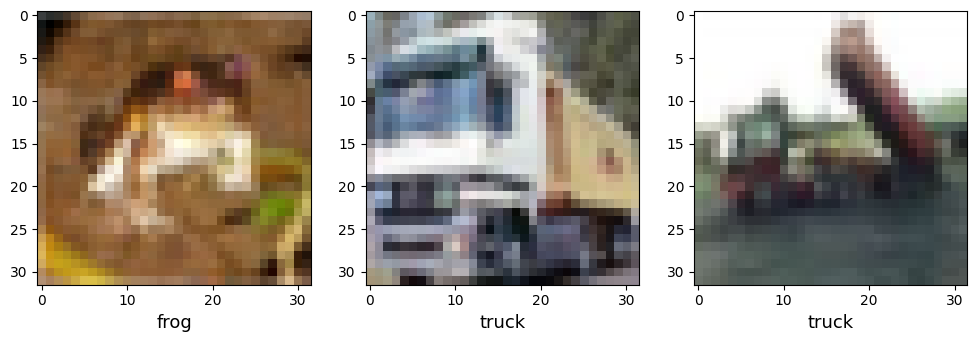

In [ ]:
sample_plot(train_images_norm, train_labels, 3)
plt.show()

# Formiranje modela za obučavanje
Za početni slučaj uzećemo 2 konvoluciona sloja sa po 32 i 64 filtera respektivno, zatim 2 potpuno povezana sloja od po 64 i 10 neurona

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

Za kompajliranje modela, uzeti su najpopularniji parametri u radu sa konvolucionim neuronskim mrežama


In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

Kompajliranju modela sledi njegovo obučavanje, zbog eksperimenta uzimamo samo 10 epoha

In [ ]:
cnn.fit(train_images_norm, train_labels, validation_data=(test_images_norm, test_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 6ms/step - loss: 1.4223 - accuracy: 0.4903 - val_loss: 1.1448 - val_accuracy: 0.5992
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0607 - accuracy: 0.6299 - val_loss: 1.0181 - val_accuracy: 0.6447
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9318 - accuracy: 0.6756 - val_loss: 0.9756 - val_accuracy: 0.6641
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8471 - accuracy: 0.7038 - val_loss: 0.9022 - val_accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7860 - accuracy: 0.7274 - val_loss: 0.9176 - val_accuracy: 0.6855
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7319 - accuracy: 0.7447 - val_loss: 0.9337 - val_accuracy: 0.6808
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6765 - accuracy: 0.7638 - val_loss: 0.9361 - val_accurac

Nakon obučavanja, možemo evaluirati dobijenu preciznost.

In [ ]:
cnn.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9308 - accuracy: 0.6984


[0.930766224861145, 0.6984000205993652]

- Preciznost za obučavanje nad podacima za treniranje iznosi solidnih 84% u poslednjoj epohi <br>
- Međutim, to nije slučaj i sa podacima namenjenim za testiranje. Kod njih možemo videti da preciznost iznosi 70%. To znači da imamo prostora za poboljšanje



# **Optimizacija**

### Dodavanje dodatnih slojeva
Za početak, testiraćemo rezultat nakon dodavanja dodatnih konvolucijskih slojeva i potpuno povezanog sloja u naš model

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),

    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images_norm, train_labels, validation_data=(test_images_norm, test_labels), epochs=10)
cnn.evaluate(test_images_norm, test_labels)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.3918 - accuracy: 0.4962 - val_loss: 1.0788 - val_accuracy: 0.6203
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9200 - accuracy: 0.6774 - val_loss: 0.8606 - val_accuracy: 0.7050
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7493 - accuracy: 0.7396 - val_loss: 0.8239 - val_accuracy: 0.7198
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6360 - accuracy: 0.7802 - val_loss: 0.7953 - val_accuracy: 0.7341
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5377 - accuracy: 0.8119 - val_loss: 0.8337 - val_accuracy: 0.7297
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4576 - accuracy: 0.8411 - val_loss: 0.8678 - val_accuracy: 0.7287
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3865 - accuracy: 0.8637 - val_loss: 0.8489 - val_accu

[1.2301688194274902, 0.7109000086784363]

Dodavanje još jednog konvolucionog sloja i jednog Dense sloja značajno poboljšava rezultat kako preciznosti nad podacima za treniranje tako i na nepoznatim podacima za testiranje. <br>
Sada preciznost nad podacima za obučavanje iznosi 92%, dok na podacima za testiranje iznosi 71%

### Dodavanje Dropout slojeva
Dropout slojevi nam pomažu kako bismo sprečili *overfitting* <br>
To se postiže tako što se odrežen procenat ulaznih parametara (u ovom slučaju 30%) resetuje na 0 tokom treniranja kako bismo smanjili pristrasnost modela tako da ne zavisi previše od ulaznih podataka

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images_norm, train_labels, validation_data=(test_images_norm, test_labels), epochs=10)
cnn.evaluate(test_images_norm, test_labels)

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.7584 - accuracy: 0.3458 - val_loss: 1.3786 - val_accuracy: 0.5246
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3335 - accuracy: 0.5191 - val_loss: 1.1356 - val_accuracy: 0.6229
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1666 - accuracy: 0.5841 - val_loss: 1.1079 - val_accuracy: 0.6234
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0713 - accuracy: 0.6223 - val_loss: 0.9892 - val_accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0097 - accuracy: 0.6457 - val_loss: 0.9541 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9550 - accuracy: 0.6658 - val_loss: 0.8855 - val_accuracy: 0.7073
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9100 - accuracy: 0.6826 - val_loss: 0.8838 - val_ac

[0.8280074000358582, 0.7276999950408936]

Možemo primetiti kako Dropout layer ima doprinos obučavanju.<br>
Međutim, ukoliko povećamo broj filtera i neurona na način ispod, rezultat se još poboljšava jer smanjujemo underfitting.

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.3),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.3),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images_norm, train_labels, validation_data=(test_images_norm, test_labels), epochs=10)
cnn.evaluate(test_images_norm, test_labels)

Epoch 1/10
1563/1563 [==============================] - 25s 14ms/step - loss: 1.4869 - accuracy: 0.4628 - val_loss: 1.1709 - val_accuracy: 0.5955
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0528 - accuracy: 0.6300 - val_loss: 0.9330 - val_accuracy: 0.6812
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8792 - accuracy: 0.6927 - val_loss: 0.8522 - val_accuracy: 0.7177
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7697 - accuracy: 0.7297 - val_loss: 0.7934 - val_accuracy: 0.7335
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6929 - accuracy: 0.7582 - val_loss: 0.7472 - val_accuracy: 0.7435
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6291 - accuracy: 0.7798 - val_loss: 0.7526 - val_accuracy: 0.7449
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5843 - accuracy: 0.7953 - val_loss: 0.7569 -

[0.7870473265647888, 0.7339000105857849]

Sada u poslednjoj epohi imamo preciznosti 82% na podacima za obučavanje, dok podaci za testiranje daju preciznost od 74%.

Malim korigovanjem Dropout frakcije možemo još više poboljšati preciznost

In [88]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

Evaluacija modela

In [87]:
cnn.fit(train_images_norm, train_labels, validation_data=(test_images_norm, test_labels), epochs=10)
cnn.evaluate(test_images_norm, test_labels)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1992 - accuracy: 0.9404 - val_loss: 0.8529 - val_accuracy: 0.7659
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.2005 - accuracy: 0.9389 - val_loss: 0.8502 - val_accuracy: 0.7623
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1956 - accuracy: 0.9417 - val_loss: 0.8286 - val_accuracy: 0.7648
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1944 - accuracy: 0.9409 - val_loss: 0.8961 - val_accuracy: 0.7613
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.2024 - accuracy: 0.9407 - val_loss: 0.8387 - val_accuracy: 0.7683
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.1982 - accuracy: 0.9419 - val_loss: 0.8484 - val_accuracy: 0.7670
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.1951 - accuracy: 0.9420 - val_loss: 0.8342 -

[0.892511248588562, 0.7601000070571899]

Sada ona iznosi dobrih 76% što se tiče podataka za testiranje

### Obučavanja na većem broju epoha
Kada smo optimalno podesili parametre, možemo pustiti model da se obučava na većem broju epoha.<br>
Nakon toga možemo vizuelno testirati kako model vrši predikciju.

In [89]:
history_cnn = cnn.fit(train_images_norm, train_labels, validation_data=(test_images_norm, test_labels), epochs=15)
cnn.evaluate(test_images_norm, test_labels)

Epoch 1/15
1563/1563 [==============================] - 24s 14ms/step - loss: 1.4594 - accuracy: 0.4676 - val_loss: 1.0794 - val_accuracy: 0.6255
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0240 - accuracy: 0.6409 - val_loss: 0.9029 - val_accuracy: 0.6931
Epoch 3/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8666 - accuracy: 0.6990 - val_loss: 0.8524 - val_accuracy: 0.7104
Epoch 4/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7662 - accuracy: 0.7326 - val_loss: 0.7654 - val_accuracy: 0.7378
Epoch 5/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6879 - accuracy: 0.7600 - val_loss: 0.7700 - val_accuracy: 0.7411
Epoch 6/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6306 - accuracy: 0.7813 - val_loss: 0.7435 - val_accuracy: 0.7421
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5698 - accuracy: 0.8031 - val_loss: 0.7225 -

[0.7323274612426758, 0.7663999795913696]

Sada vidimo da preciznost modela iznosi solidnih 77%.

# Testiranje predikcije
Sada ćemo testirati kako naš model vrši predikciju korišćenjem 10 slika iz hrpe za testiranje.

313/313 [==============================] - 1s 3ms/step
['dog', 'ship', 'airplane', 'airplane', 'frog', 'frog', 'automobile', 'deer', 'cat', 'automobile']



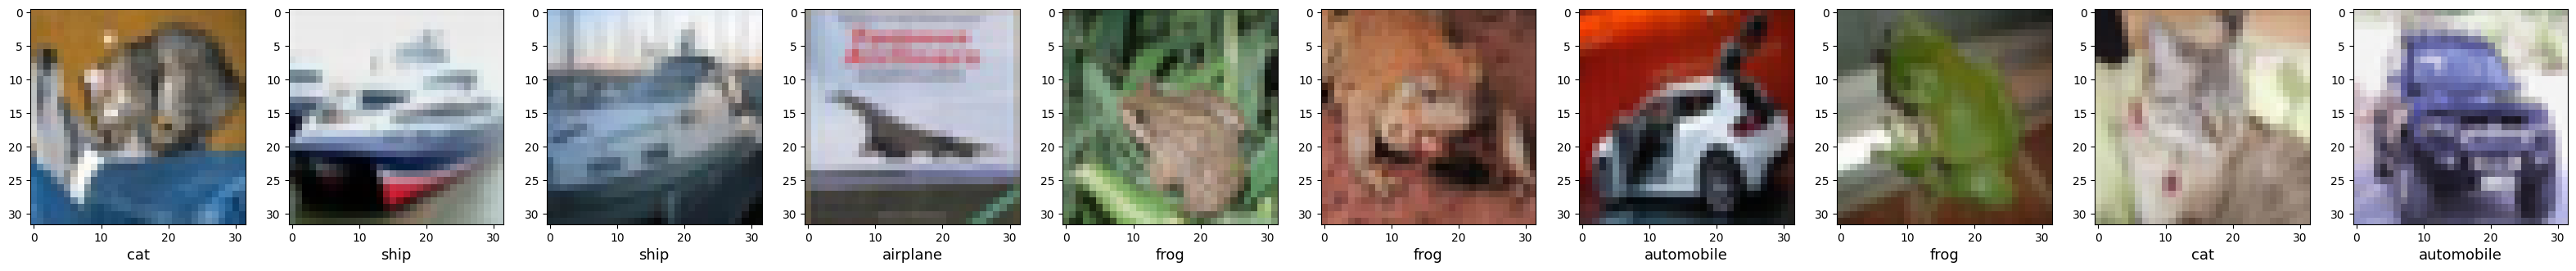

In [90]:
test_prediction = cnn.predict(test_images_norm)
test_prediction = test_prediction[:10]
test_classes = [class_names[np.argmax(i)] for i in test_prediction]

print(test_classes)
print()

sample_plot(test_images_norm, test_labels, 10)
plt.show()

# Prethodna obrada slika pomoću OpenCV


## 1. Grayscale
Funkcija za pretvaranje piksela u grayscale oblik

In [91]:
def grayscale(images):
    grayscale_images = []
    for image in images:
        image_uint8 = np.uint8(image)
        grayscale_image = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)
        grayscale_images.append(grayscale_image)
    return np.array(grayscale_images)

Primena funkcije na slikama za treniranje i testiranje

In [92]:
grayscale_train_images = grayscale(train_images)
grayscale_test_images = grayscale(test_images)

# Normalizacija
grayscale_train_images_norm = grayscale_train_images / 255.0
grayscale_test_images_norm = grayscale_test_images / 255.0

Prikaz slika nakon primene filtera:

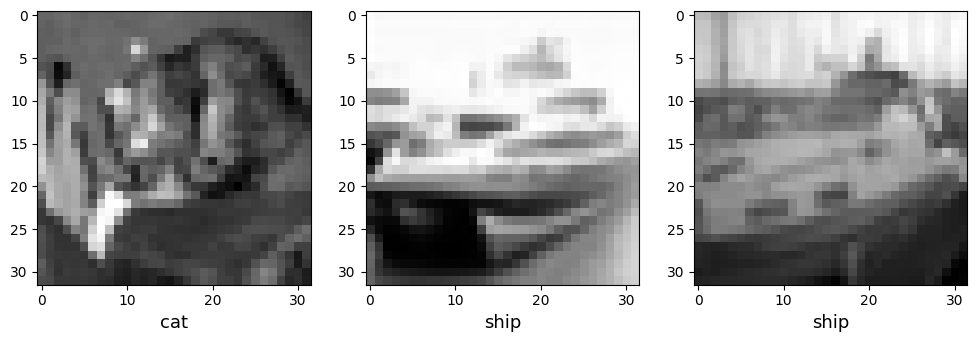

In [93]:
sample_plot(grayscale_test_images_norm, test_labels, 3, cmap="gray")
plt.show()

Pravljenje novog modela zbog izmenjenih dimenzija ulaznih slika:


In [94]:
cnn_grayscale = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(32, 32, 1)
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])


cnn_grayscale.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

## Obučavanje i evaluacija novodobijenog modela

In [95]:
history_cnn_grayscale = cnn_grayscale.fit(grayscale_train_images_norm, train_labels, validation_data=(grayscale_test_images_norm, test_labels), epochs=15)
cnn_grayscale.evaluate(grayscale_test_images_norm, test_labels)

Epoch 1/15
1563/1563 [==============================] - 25s 14ms/step - loss: 1.5800 - accuracy: 0.4267 - val_loss: 1.1736 - val_accuracy: 0.6013
Epoch 2/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1058 - accuracy: 0.6156 - val_loss: 0.9802 - val_accuracy: 0.6708
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9558 - accuracy: 0.6697 - val_loss: 0.8962 - val_accuracy: 0.7031
Epoch 4/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8538 - accuracy: 0.7060 - val_loss: 0.8138 - val_accuracy: 0.7206
Epoch 5/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7917 - accuracy: 0.7250 - val_loss: 0.8033 - val_accuracy: 0.7312
Epoch 6/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7277 - accuracy: 0.7446 - val_loss: 0.8024 - val_accuracy: 0.7238
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6733 - accuracy: 0.7660 - val_loss: 0.7957 -

[0.795681893825531, 0.7347999811172485]

## Rezultati grayscale obrade
Rezultati treniranja na grayscale skupu podataka nisu bolji od običnog<br>
Moja pretpostavka je zato što su slike male, i postoji dosta mešanja pozadina i samim tim stapanja kontrasta, tako da to negativno utiče na prepoznavanje karakteristika prilikom treniranja

## Testiranje predikcije
Testiranje predikcije, sada na grayscale verzijama slika.

313/313 [==============================] - 1s 3ms/step
['cat', 'ship', 'airplane', 'ship', 'cat', 'frog', 'truck', 'deer', 'cat', 'truck']



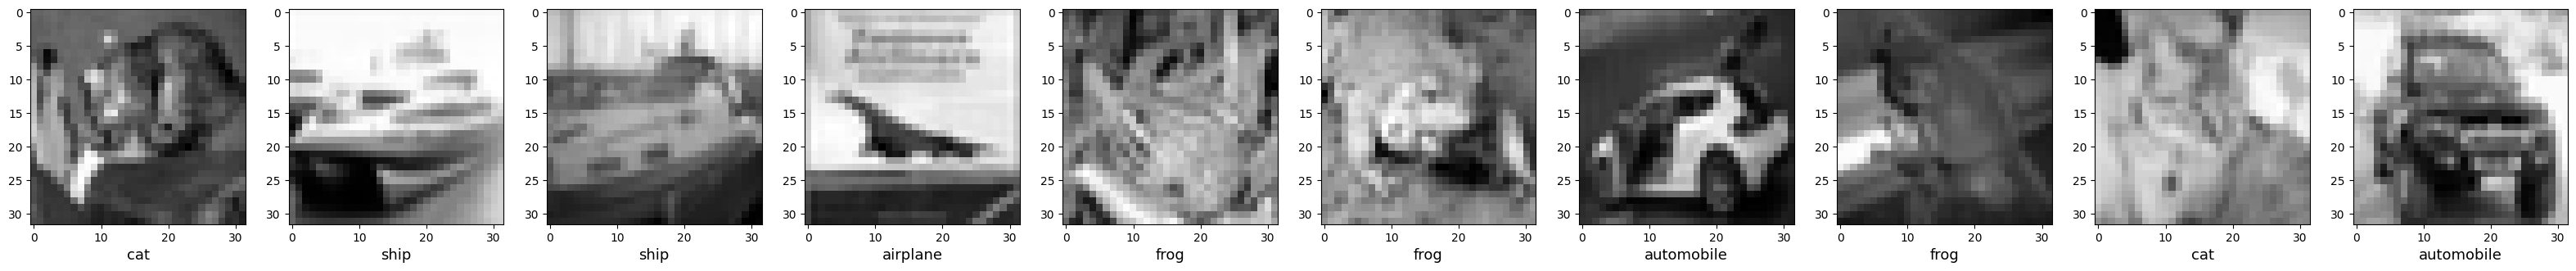

In [96]:
grayscale_test_prediction = cnn_grayscale.predict(grayscale_test_images_norm)
grayscale_test_prediction = grayscale_test_prediction[:10]
grayscale_test_classes = [class_names[np.argmax(i)] for i in grayscale_test_prediction]

print(grayscale_test_classes)
print()

sample_plot(grayscale_test_images_norm, test_labels, 10, cmap="gray")
plt.show()

## 2. Nasumična rotacija
Funkcija koja nasumično vrši rotaciju po horizontalnoj osi kao i rotiranje slike za nasumičan broj stepeni između $\pm$90.

In [97]:
def augment(images):
    augmented_images = []
    for image in images:
        if np.random.rand() < 0.5:
            image = cv2.flip(image, 1)

        angle = np.random.randint(-90, 90)
        rows, cols, _ = image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

        augmented_images.append(image)
    
    return np.array(augmented_images)


Primena efekta na ulaznom skupu slika

In [98]:
augmented_train_images = augment(train_images)
augmented_test_images = augment(test_images)

Iscrtavanje slika nakon izmena

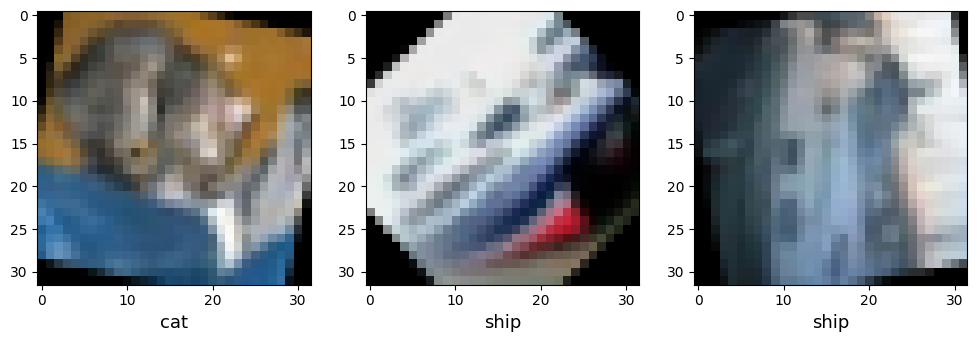

In [99]:
sample_plot(augmented_test_images, test_labels, 3)
plt.show()

### Konstrukcija modela za rotirane slike

In [100]:
cnn_augmented = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn_augmented.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

### Treniranje modela na izmenjenim slikama

In [101]:
history_cnn_augmented = cnn_augmented.fit(augmented_train_images, train_labels, validation_data=(augmented_test_images, test_labels), epochs=15)
cnn_augmented.evaluate(augmented_test_images, test_labels)

Epoch 1/15
1563/1563 [==============================] - 24s 13ms/step - loss: 2.3962 - accuracy: 0.2376 - val_loss: 1.8507 - val_accuracy: 0.3570
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8019 - accuracy: 0.3462 - val_loss: 1.8310 - val_accuracy: 0.3584
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7229 - accuracy: 0.3775 - val_loss: 1.7289 - val_accuracy: 0.3776
Epoch 4/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6616 - accuracy: 0.3986 - val_loss: 1.6929 - val_accuracy: 0.3919
Epoch 5/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6142 - accuracy: 0.4187 - val_loss: 1.6565 - val_accuracy: 0.4048
Epoch 6/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5737 - accuracy: 0.4350 - val_loss: 1.5830 - val_accuracy: 0.4493
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5304 - accuracy: 0.4533 - val_loss: 1.5493 -

[1.3920918703079224, 0.508899986743927]

## Rezultati obrade nasumičnom rotacijom
Rezultati obrade su nešto lošiji od grayscale rezultata, ali to je na neki način očekivano zbog nasumičnih modifikacija slika tokom obučavanja. <br>
Na iscrtavanju slika se takođe može videti da je prisutno gubljenje određenog dela slike prilikom njene rotacije.



## Testiranje predikcije
Testiranje na nasumično rotiranim ulaznim slikama

313/313 [==============================] - 1s 3ms/step
['cat', 'ship', 'ship', 'ship', 'deer', 'frog', 'automobile', 'frog', 'deer', 'truck']



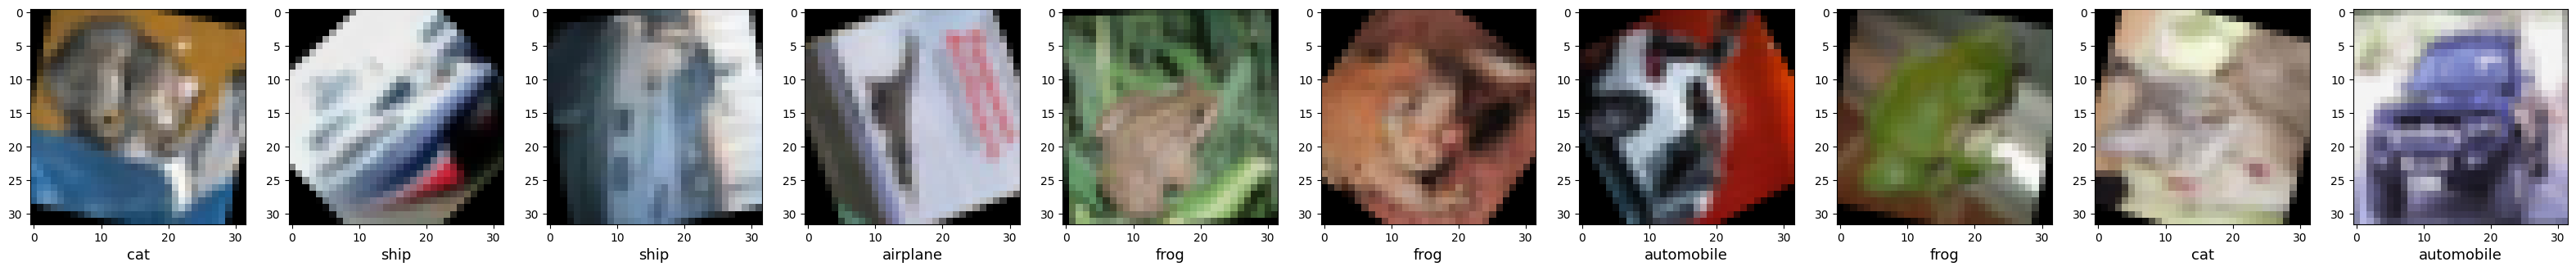

In [102]:
augmented_prediction = cnn_augmented.predict(augmented_test_images)
augmented_prediction = augmented_prediction[:10]
augmented_classes = [class_names[np.argmax(i)] for i in augmented_prediction]

print(augmented_classes)
print()

sample_plot(augmented_test_images, test_labels, 10)
plt.show()

# Poređenje performansi

### Iscrtavanje preciznosti sva 3 modela

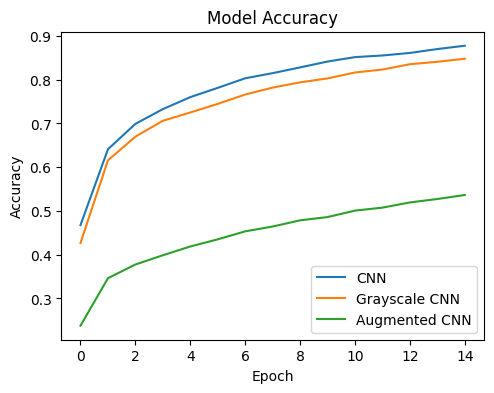

In [112]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN')
plt.plot(history_cnn_grayscale.history['accuracy'], label='Grayscale CNN')
plt.plot(history_cnn_augmented.history['accuracy'], label='Augmented CNN')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Iscrtavanje odstupanja sva 3 modela

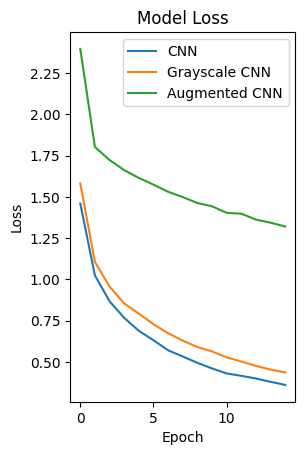

In [113]:
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN')
plt.plot(history_cnn_grayscale.history['loss'], label='Grayscale CNN')
plt.plot(history_cnn_augmented.history['loss'], label='Augmented CNN')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()